In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
records = 10
data = []

In [49]:
with open('Dataset/endomondoHR_proper.json') as f:
    for record_counter, l in enumerate(f):
        data.append(eval(l))
        if record_counter >= records:
            break

In [50]:
df = pd.DataFrame(data)

In [51]:
df.head()

,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915
2,"[76.4, 73.2, 72.4, 73.0, 73.0, 70.8, 69.2, 69....",male,"[99, 105, 113, 110, 109, 110, 108, 121, 116, 1...",389643739,"[60.17326201312244, 60.173205351457, 60.172969...","[24.64995657093823, 24.650197718292475, 24.651...","[4.0464, 13.8204, 16.9776, 19.9404, 28.7856, 3...",bike,"[1407858459, 1407858466, 1407858478, 140785849...",https://www.endomondo.com/users/10921915/worko...,10921915
3,"[28.6, 29.4, 29.4, 29.4, 28.0, 27.0, 25.2, 23....",male,"[99, 105, 113, 109, 112, 116, 116, 114, 114, 1...",386729739,"[60.173286236822605, 60.17323946580291, 60.173...","[24.649874344468117, 24.650242729112506, 24.65...","[7.4988, 15.4008, 17.8668, 21.5712, 24.1416, 3...",bike,"[1407432042, 1407432048, 1407432056, 140743206...",https://www.endomondo.com/users/10921915/worko...,10921915
4,"[32.0, 32.0, 32.0, 35.8, 36.2, 36.2, 36.2, 36....",male,"[110, 113, 114, 116, 123, 126, 129, 135, 137, ...",383186560,"[60.17329327762127, 60.17327332869172, 60.1732...","[24.64979832060635, 24.64992195367813, 24.6500...",NaN,bike (transport),"[1406909434, 1406909436, 1406909437, 140690943...",https://www.endomondo.com/users/10921915/worko...,10921915


In [38]:
df.to_csv('Dataset/sample.csv', index=False, header=False)

In [7]:
df.to_json(r'Dataset/sample.json', orient='records')

In [46]:
df.shape

(51, 11)

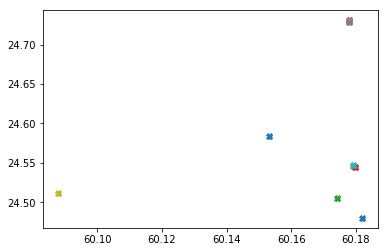

In [56]:
for val in df.iterrows():
    lat = list(val[1].latitude)
    lon = list(val[1].longitude)
    
    avg_lat = sum(lat) / len(lat)
    avg_lon = sum(lon) / len(lon)
    
#     plt.plot(lat, lon)
#     plt.scatter(lat[0], lon[0])
    
    plt.plot(avg_lat, avg_lon, marker="X")
    